In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
#Dataset
import kagglehub
# Download latest version
path = kagglehub.dataset_download("ulrikthygepedersen/online-retail-dataset")
print("Path to dataset files:", path)
df = pd.read_csv(f'{path}/online_retail.csv')
df.head()

Path to dataset files: /home/mathias/.cache/kagglehub/datasets/ulrikthygepedersen/online-retail-dataset/versions/2


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [61]:
invoice_counts = df['InvoiceNo'].value_counts()
top_invoice = invoice_counts.index[0]
df[df['InvoiceNo'] == top_invoice]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
430237,573585,11001,ASSTD DESIGN RACING CAR PEN,2,2011-10-31 14:41:00,3.29,NaN,United Kingdom
430238,573585,15036,ASSORTED COLOURS SILK FAN,15,2011-10-31 14:41:00,1.63,NaN,United Kingdom
430239,573585,15039,SANDALWOOD FAN,15,2011-10-31 14:41:00,1.63,NaN,United Kingdom
430240,573585,15056BL,EDWARDIAN PARASOL BLACK,1,2011-10-31 14:41:00,12.46,NaN,United Kingdom
430241,573585,15056N,EDWARDIAN PARASOL NATURAL,1,2011-10-31 14:41:00,12.46,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
431346,573585,90209C,PINK ENAMEL+GLASS HAIR COMB,3,2011-10-31 14:41:00,2.07,NaN,United Kingdom
431347,573585,90214S,"LETTER ""S"" BLING KEY RING",1,2011-10-31 14:41:00,0.83,NaN,United Kingdom
431348,573585,DOT,DOTCOM POSTAGE,1,2011-10-31 14:41:00,2019.05,NaN,United Kingdom
431349,573585,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-10-31 14:41:00,16.67,NaN,United Kingdom


In [62]:
#No hace falta ni graficar para saber que hay outliers
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


<Axes: title={'center': 'Boxplot - UnitPrice'}, ylabel='UnitPrice'>

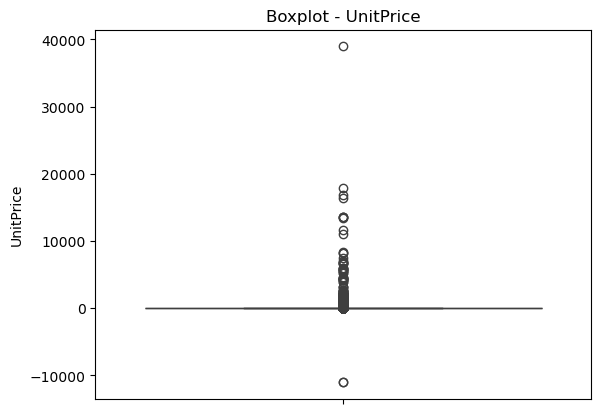

In [63]:
plt.title('Boxplot - UnitPrice')
sns.boxplot(data= df, y='UnitPrice')

In [64]:
print(len(df))
def removeOutliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    filtered_amount = len(df) - len(filtered_df)
    print(f'{filtered_amount / len(df) * 100} removed from {column}')
    return filtered_df

541909


In [65]:
#mejor creo yo
df = removeOutliers(df, 'Quantity')
df = removeOutliers(df, 'UnitPrice')
df.describe()

10.817129813308139 removed from Quantity
6.718533385751827 removed from UnitPrice


,Quantity,UnitPrice,CustomerID
count,450820.000000,450820.000000,333143.000000
mean,4.768103,2.780913,15343.687104
std,4.603068,2.040645,1704.843207
min,-12.000000,0.000000,12347.000000
25%,1.000000,1.250000,14040.000000
50%,3.000000,2.100000,15281.000000
75%,7.000000,3.750000,16843.000000
max,23.000000,8.500000,18287.000000


<Axes: title={'center': 'Boxplot - Quantity'}, ylabel='Quantity'>

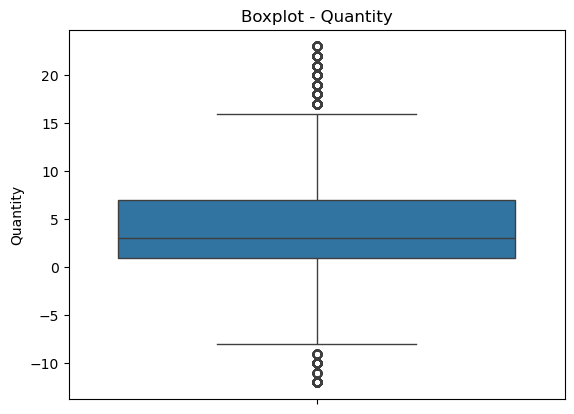

In [66]:
plt.title('Boxplot - Quantity')
sns.boxplot(data= df, y='Quantity')

<Axes: title={'center': 'Boxplot - UnitPrice'}, ylabel='UnitPrice'>

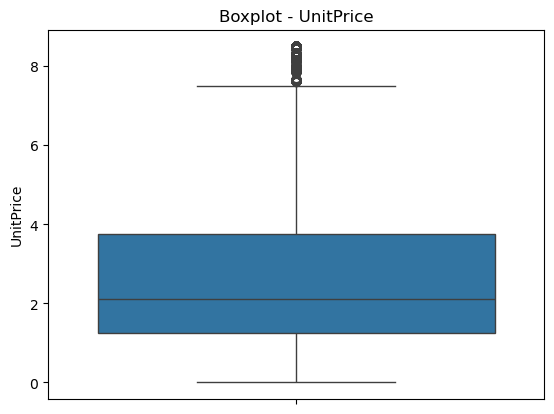

In [67]:
plt.title('Boxplot - UnitPrice')
sns.boxplot(data= df, y='UnitPrice')

In [68]:
#Hay una NADA en description. Los elimino
df.isna().mean() * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.177898
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     26.102879
Country         0.000000
dtype: float64

In [69]:
df = df.dropna(subset=['Description'])

In [70]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print(df['InvoiceDate'].min())
print(df['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


/tmp/ipykernel_14166/2370701929.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  daily_sales = df.set_index('InvoiceDate').resample('M')['Quantity'].sum()


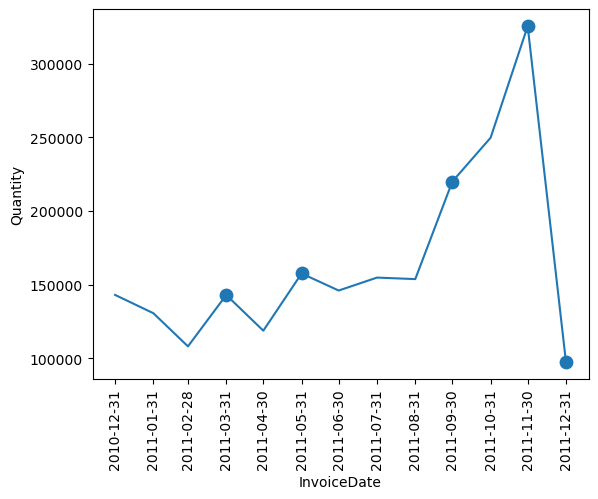

In [71]:
#se agrupa por mes y se suma
daily_sales = df.set_index('InvoiceDate').resample('M')['Quantity'].sum()
changes = daily_sales.pct_change()


threshold = 0.2
spikes = changes[abs(changes) > threshold]


sns.lineplot(data=daily_sales)
plt.scatter(spikes.index, daily_sales.loc[spikes.index], s=80)
plt.xticks(daily_sales.index, rotation=90)


plt.show()

In [72]:
#guardo la variable por si luego se quiere particionar por estos cambios ""bruscos""
partitions = changes[:-1]

<Axes: ylabel='Description'>

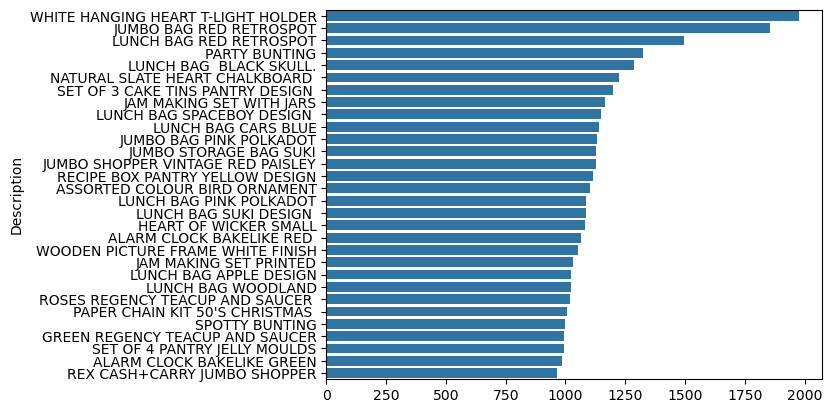

In [73]:
#top productos
topProducts = df['Description'].value_counts().head(30)
sns.barplot(x=topProducts.values, y=topProducts.index)

In [74]:
#Esto lo hago para aligerar el dataset
bef = len(df)
counts = df['Description'].value_counts()
valid_items = counts[counts >= 50].index
df = df[ df['Description'].isin(valid_items)]
print(f'Removed {bef - len(df)}')
print(len(df))

Removed 29831
420187


In [75]:
#se agrupa para observar como se ven las canastas
basket = df.groupby('InvoiceNo')['Description'].apply(list).reset_index()
basket.head()

,InvoiceNo,Description
0,536365,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET..."
1,536366,[HAND WARMER UNION JACK]
2,536367,"[POPPY'S PLAYHOUSE BEDROOM , POPPY'S PLAYHOUSE..."
3,536368,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS..."
4,536369,[BATH BUILDING BLOCK WORD]


In [76]:
print(f'Cantidad de transacciones a lo largo del a;o {len(basket)}')

Cantidad de transacciones a lo largo del a;o 20447


In [77]:
df.to_csv('./data/cleaned_online_retail.csv', index=False)